In [1]:
import sys
sys.path.append('/home/diego/python/convolution-kernels-pytorch/')
sys.path.append('/home/diego/python/stochastic-processes/')
from kernel.base import Kernel

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

from scipy.signal import fftconvolve
from processes.ou import OUProcess

%load_ext autoreload
%autoreload 2

TypeError: not all arguments converted during string formatting

## case usage 1

In [2]:
support = torch.arange(0, 200, 1)
tau = 10
basis = torch.exp(-support / tau)

ker = Kernel(basis=basis, support=[support[0], support[-1]])

x = torch.randn(400, 1)
y = ker(x).detach().numpy()

plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend()

TypeError: super(type, obj): obj must be an instance or subtype of type

## case usage 2

Parameter containing:
tensor([ 1.9064, -0.9295], requires_grad=True)


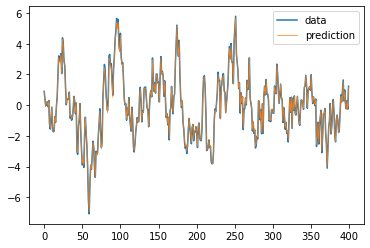

In [9]:
from torch.optim import SGD
from torch.nn.functional import mse_loss

support = torch.arange(0, 200, 1)
tau_basis = torch.tensor([10, 20])
basis = torch.exp(-support[:, None] / tau_basis[None, :])
ker_true = Kernel(basis=basis, support=[support[0], support[-1]], weight=torch.tensor([2., -1.]))
x_data = torch.randn((400, 1))
y_data = ker_true(x_data).detach()

support = torch.arange(0, 200, 1)
tau_basis = torch.tensor([10, 20])
basis = torch.exp(-support[:, None] / tau_basis[None, :])
ker = Kernel(basis=basis, support=[support[0], support[-1]])

nsteps = 400
optim = SGD(ker.parameters(), lr=1e-3, momentum=0.9)

def train():
#     losses = []
    for i in range(nsteps):
        optim.zero_grad()
        y = ker(x_data)
        mse = mse_loss(y, y_data)
        mse.backward()
        optim.step()
#         losses.append(mse)
#     return losses

train()
y = ker(x_data).detach()

print(ker.weight)
    
# plt.figure()
# plt.plot(losses)

plt.figure()
plt.plot(y_data, label='data')
plt.plot(y, lw=0.7, label='prediction')
plt.legend()

## case usage 3

In [10]:
from kernel.fun import KernelFun

def aux(t, sigma):
    return torch.exp(torch.abs(t) / sigma)

KernelFun(aux, basis_kwargs=dict(sigma=torch.tensor([10, 50, 100])))

AttributeError: 'NoneType' object has no attribute 'shape'

In [52]:
%timeit ker.convolve_continuous(x, trim=True)

3.31 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%timeit ker.convolve_continuous(x, trim=True)

3.28 ms ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
